In [1]:
# import pickle
# finalembeddings = None
# with open('longformerembeddings.pickle', 'rb') as f:
#     finalembeddings = pickle.load(f)
# emb = np.array(finalembeddings)
# stig_score = util.cos_sim(emb, stig_embedding)
# glor_score = util.cos_sim(emb, glor_embedding)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

FinancialLabel = "Financial/Job Problem"
Legallabel = "Legal Problem"
SchoolLabel = "School or Academic Related Problem"
HealthLabel = "Lack of Access to Health/Mental Health Care"
FinancialPredicted = "Financial - Predicted"
LegalPredicted = "Legal - Predicted"
SchoolPredicted = "School - Predicted"
HealthPredicted = "Health - Predicted"

In [3]:
from tqdm import tqdm
result = pd.read_csv('finalbendatasetwithpreds.csv')
result = result[(result['Reasoning'] != "TooManyTokens") & (result['Reasoning'] != "NotSuicide")]
result = result.drop([FinancialLabel, SchoolLabel, Legallabel, HealthLabel, 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Comments', 'None', 'Error'], axis = 1)
print(result.shape)


(13629, 14)


In [4]:
index_of_max_value = result['Stigma Score'].idxmax()

# Get the row using iloc or loc
result.loc[index_of_max_value]['content']

'A man and woman are dead as a result of an apparent murder/suicide, according to Acadia Parish Sheriff K.P. Gibson.\n\n Gibson said deputies responded to McCain Road near Goodrich Road late Wednesday morning regarding a shooting incident.\n\n Investigators discovered an adult female and an adult male in a vehicle. Both were pronounced dead at the scene.\n\n The investigation revealed that the female had been driving the vehicle along McCain Road when the male subject allegedly shot her.\n\n The male then took his own life, investigators said.\n\n The vehicle came to rest in a ditch off McCain Road, the sheriff said.\n\n The investigation is continuing.'

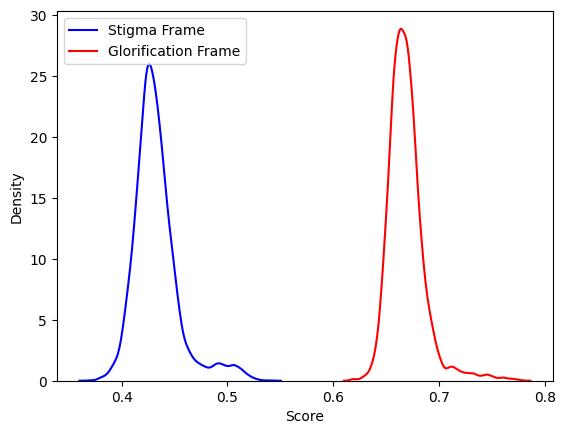

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create KDE plots for arrays A and B
sns.kdeplot(result['Stigma Score'], label='Stigma Frame', color='blue')
sns.kdeplot(result['Glorification Score'], label='Glorification Frame', color='red')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

In [6]:
import pandas as pd
import numpy as np
import math

FinancialPredicted = "Financial - Predicted"
LegalPredicted = "Legal - Predicted"
SchoolPredicted = "School - Predicted"
HealthPredicted = "Health - Predicted"

glorification = []
with open("glorification_dim.txt", "r") as grilled_cheese:
    lines = grilled_cheese.readlines()
    for l in lines:
        glorification.append(l.replace("\n", ""))
    print(glorification)

stigma = []
with open("stigma_dim.txt", "r") as grilled_cheese:
    lines = grilled_cheese.readlines()
    for l in lines:
        stigma.append(l.replace("\n", ""))
    print(stigma)

['invested', 'unfearing', 'warm', 'attached', 'dedicated', 'intrepid', 'realistic', 'nobleman', 'noetic', 'apprehensible', 'intelligible', 'motivated', 'understandable', 'unattackable', 'hardy', 'actuate', 'entrust', 'unafraid', 'courageous', 'graspable', 'perceivable', 'brave', 'dedicate', 'noble', 'committed', 'strong', 'intrust', 'motivate', 'inviolable', 'confide', 'intellectual', 'endure', 'trust', 'unassailable', 'secure', 'rational', 'right', 'fearless', 'dauntless', 'determined', 'devoted', 'guided', 'sensible', 'reasoned', 'reasonable', 'coherent', 'unwavering', 'steadfast', 'enthusiastic', 'honorable', 'decent', 'wise', 'upstanding']
['weak', 'washy', 'pitiful', 'inexcusable', 'immoral', 'silly', 'wretched', 'failures', 'unlearned', 'immorality', 'punishing others', 'loser', 'heedless', 'unfair', 'barbarous', 'scandalous', 'self-important', 'malefic', 'unnatural', 'superfluous', 'trigger-happy', 'unwarranted', 'feeble', 'dazed', 'cruel', 'lazy', 'vengeful', 'slothful', 'eviln

In [7]:
from transformers import LongformerTokenizer, LongformerModel
import sentence_transformers.util
import torch

def frame_embedding_from_longformer(word_list):
    tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')  
    model = LongformerModel.from_pretrained('allenai/longformer-base-4096')  
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)
    inputs = tokenizer.encode_plus(word_list, return_tensors='pt', max_length=4096, truncation=True).to(device) 
    model = model.to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)

    word_embeddings = outputs.last_hidden_state
    print(word_embeddings.shape)
    # Define pooling strategy (e.g., mean pooling)
    pooling_strategy = 'mean'

    # Pool the embeddings
    if pooling_strategy == 'mean':
        word_embeddings_pooled = torch.mean(word_embeddings, dim=1)
    elif pooling_strategy == 'max':
        word_embeddings_pooled = torch.max(word_embeddings, dim=1).values
    else:
        # Default to using the [CLS] token embedding
        word_embeddings_pooled = word_embeddings[:, 0, :]

    # Convert tensor to numpy array
    word_embeddings_pooled = word_embeddings_pooled.numpy()

    # Normalize the embeddings
    word_embeddings_pooled = word_embeddings_pooled / np.linalg.norm(word_embeddings_pooled, axis=1, keepdims=True)
    print(word_embeddings_pooled.shape)
    ans = word_embeddings_pooled.mean(axis = 0)
    print(ans.shape)
    return ans


glor_embedding = frame_embedding_from_longformer(glorification)
stig_embedding = frame_embedding_from_longformer(stigma)

#print(stig_embedding)

/Users/minijain/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 55, 768])
(1, 768)
(768,)
torch.Size([1, 126, 768])
(1, 768)
(768,)


In [8]:
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')  
model = LongformerModel.from_pretrained('allenai/longformer-base-4096')  
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

def article_embedding_longformer(art):
    inputs = tokenizer.encode_plus(art, return_tensors='pt', max_length=4096, truncation=True).to(device)
    outputs = None
    with torch.no_grad():  
        outputs = model(**inputs, output_hidden_states=True)
    embeddings = outputs.last_hidden_state  
    #print(embeddings.shape)
    embeddings = embeddings.mean(axis = 1)
    #print(embeddings.shape)
    embeddings = embeddings.mean(axis = 0)
    #print(embeddings.shape)

    return embeddings


In [9]:

article_embeddings = [[]] * len(arr)

NameError: name 'arr' is not defined

In [ ]:
# # done till 3560 prev time
# for i in tqdm(range(0, 1)):
#     # if (article_embeddings[i] != []):
#     #     continue
#     article_embeddings[i] = article_embedding_longformer(arr[i])

# import pickle
# with open('longformerembeddings.pickle', 'wb') as f:
#     pickle.dump(article_embeddings, f)

100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


In [ ]:
from fuzzywuzzy import fuzz
import numpy as np
from multiprocessing import Pool

def compute_ratios(args):
    i, j, article_i, article_j = args
    ratio = fuzz.ratio(article_i, article_j)
    partial_ratio = fuzz.partial_ratio(article_i, article_j)
    token_sort_ratio = fuzz.token_sort_ratio(article_i, article_j)
    token_set_ratio = fuzz.token_set_ratio(article_i, article_j)
    return i, j, ratio, partial_ratio, token_sort_ratio, token_set_ratio

suicidearticles = result['content'].to_list()
n_articles = len(suicidearticles)

# Generate arguments for multiprocessing
args_list = []
for i in range(n_articles):
    for j in range(i + 1, n_articles):
        args_list.append((i, j, suicidearticles[i], suicidearticles[j]))

# Parallel computation of ratios
with Pool() as pool:
    results = pool.map(compute_ratios, args_list)

# Initialize arrays to store ratios
ratios = np.zeros((n_articles, n_articles))
partial_ratios = np.zeros((n_articles, n_articles))
token_sort_ratios = np.zeros((n_articles, n_articles))
token_set_ratios = np.zeros((n_articles, n_articles))

# Populate the arrays with computed ratios
for i, j, ratio, partial_ratio, token_sort_ratio, token_set_ratio in results:
    ratios[i][j] = ratio
    partial_ratios[i][j] = partial_ratio
    token_sort_ratios[i][j] = token_sort_ratio
    token_set_ratios[i][j] = token_set_ratio

    # Print comparisons if ratio is above 50
    if ratio > 50:
        print(i, j, " Ratio: ", ratio)
    if partial_ratio > 50:
        print(i, j, " Partial Ratio:", partial_ratio)
    if token_sort_ratio > 50:
        print(i, j, " Token Sort Ratio:", token_sort_ratio)
    if token_set_ratio > 50:
        print(i, j, " Token Set Ratio:", token_set_ratio)


Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'compute_ratios' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library

KeyboardInterrupt: 

In [11]:
from fuzzywuzzy import fuzz
import numpy as np
from multiprocessing import Pool
import test

# def compute_ratios(args):
#     i, j, article_i, article_j = args
#     ratio = fuzz.ratio(article_i, article_j)
#     partial_ratio = fuzz.partial_ratio(article_i, article_j)
#     token_sort_ratio = fuzz.token_sort_ratio(article_i, article_j)
#     token_set_ratio = fuzz.token_set_ratio(article_i, article_j)
#     return i, j, ratio, partial_ratio, token_sort_ratio, token_set_ratio

suicidearticles = result['content'].to_list()
n_articles = len(suicidearticles)

# Generate arguments for multiprocessing
args_list = []
for i in range(n_articles):
    for j in range(i + 1, n_articles):
        args_list.append((i, j, suicidearticles[i], suicidearticles[j]))

# Parallel computation of ratios
with Pool() as pool:
    results = pool.map(compute_ratios, args_list)

# Initialize arrays to store ratios
ratios = np.zeros((n_articles, n_articles))
partial_ratios = np.zeros((n_articles, n_articles))
token_sort_ratios = np.zeros((n_articles, n_articles))
token_set_ratios = np.zeros((n_articles, n_articles))

# Populate the arrays with computed ratios
for i, j, ratio, partial_ratio, token_sort_ratio, token_set_ratio in results:
    ratios[i][j] = ratio
    partial_ratios[i][j] = partial_ratio
    token_sort_ratios[i][j] = token_sort_ratio
    token_set_ratios[i][j] = token_set_ratio

    # Print comparisons if ratio is above 50
    if ratio > 50:
        print(i, j, " Ratio: ", ratio)
    if partial_ratio > 50:
        print(i, j, " Partial Ratio:", partial_ratio)
    if token_sort_ratio > 50:
        print(i, j, " Token Sort Ratio:", token_sort_ratio)
    if token_set_ratio > 50:
        print(i, j, " Token Set Ratio:", token_set_ratio)


Process SpawnPoolWorker-14:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'compute_ratios' on <module '__main__' (built-in)>
Process SpawnPoolWorker-13:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Libra

KeyboardInterrupt: 

In [19]:
from fuzzywuzzy import fuzz, process
import numpy as np
from multiprocessing import Pool
import test


art = result['content'].to_list()
art[1618]
art[1623]

# Simple ratio comparison
ratio = fuzz.ratio(art[1618], art[1885])
print("Ratio:", ratio)  # Output: Ratio: 91

# Partial ratio comparison
partial_ratio = fuzz.partial_ratio(art[1618], art[1885])
print("Partial Ratio:", partial_ratio)  # Output: Partial Ratio: 100

# Token sort ratio comparison
token_sort_ratio = fuzz.token_sort_ratio(art[1618], art[1885])
print("Token Sort Ratio:", token_sort_ratio)  # Output: Token Sort Ratio: 100

# Token set ratio comparison
token_set_ratio = fuzz.token_set_ratio(art[1618], art[1885])
print("Token Set Ratio:", token_set_ratio)  # Output: Token Set Ratio: 86

# Using process module for finding the best match from a list of choices
choices = art
best_match = process.extractOne(art[1618], choices)
print("Best Match:", best_match)  # Output: Best Match: ('apple', 90)

Ratio: 37
Partial Ratio: 42
Token Sort Ratio: 48
Token Set Ratio: 51


KeyboardInterrupt: 

In [23]:
art[1946]

'WASHINGTON ( AP ) — The congressman ’ s voice cracked and he paused to drink from a bottle of water as he told of apologizing to his daughter for bringing her to the U.S. Capitol on the day a deadly mob overran it .\nWatch Raskin ’ s remarks in the player above .\nBut it was recalling what she said to him next , after he assured her nothing like that would happen again , that made Maryland Democratic Rep. Jamie Raskin break down .\n“ She said , ’ Dad , I don ’ t want to @ @ @ @ @ @ @ ” Raskin said softly , squeezing his nose and shaking his head to clear away tears .\n“ Of all the terrible , brutal things I saw and I heard on that day and since then , that one hit me the hardest.\n” Raskin , 58 , a former constitutional law professor , is leading the impeachment prosecution in the Senate of former President Donald Trump , who is charged with inciting last month ’ s siege of the Capitol to overturn the election he lost to Democrat Joe Biden .\nFive @ @ @ @ @ @ @ insurrection .\nTrump i

In [26]:
import math
maximum = 0
for i in range(len(suicidearticles)):
    maximum = max(maximum, len(suicidearticles[i]))
    print(i, ": ", len(suicidearticles[i]))

print(maximum)


0 :  2107
1 :  28367
2 :  838
3 :  956
4 :  3446
5 :  9917
6 :  4171
7 :  5511
8 :  4242
9 :  11395
10 :  3687
11 :  1435
12 :  2623
13 :  827
14 :  2643
15 :  1126
16 :  2568
17 :  5925
18 :  2707
19 :  2103
20 :  1626
21 :  1044
22 :  14878
23 :  3502
24 :  2184
25 :  2362
26 :  2306
27 :  5324
28 :  2569
29 :  3014
30 :  2335
31 :  3077
32 :  2152
33 :  5379
34 :  3902
35 :  14878
36 :  2335
37 :  4195
38 :  3161
39 :  6454
40 :  1491
41 :  2372
42 :  2034
43 :  4937
44 :  5742
45 :  1223
46 :  6333
47 :  2562
48 :  5309
49 :  6593
50 :  3044
51 :  3459
52 :  1153
53 :  5364
54 :  3204
55 :  1856
56 :  5796
57 :  1942
58 :  2370
59 :  3296
60 :  2153
61 :  10933
62 :  1760
63 :  6618
64 :  1362
65 :  5687
66 :  4768
67 :  9540
68 :  5584
69 :  5617
70 :  6646
71 :  4852
72 :  7093
73 :  7581
74 :  6217
75 :  3232
76 :  5756
77 :  1318
78 :  2538
79 :  5889
80 :  5334
81 :  3246
82 :  5020
83 :  7464
84 :  4408
85 :  3629
86 :  2685
87 :  12626
88 :  1245
89 :  2652
90 :  2073
91 :  